**IELE_4014**  
**Felipe Velásquez Montoya**
&nbsp;&nbsp;&nbsp;&nbsp; *cód estudiante:* 201632422
# Reto 1
Problema de clasificación de Pulsares utilizando el dataset HTRU2 (https://archive.ics.uci.edu/ml/datasets/HTRU2) y regresión logística de scikit learn.

**Paso 0**   
Instalación de dependencia sklearn (para modelos), numpy (para matrices y funciones mateḿaticas) y matplotlib para gráficas.

In [1]:
%pip install --user sklearn
%pip install --user numpy
%pip install --user matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Se inicia importando librerías y módulos de sklearn necesarios para realizar el ejercicio

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

A continuación, se cargan los datos de su correspondiente csv. Como se puede comprobar, los datos cargados tienen 17898 filas y 9 columnas, las primeras 8 corresponden al vector X y la última a la clase (y) que se busca predecir.

In [3]:
data_matrix = np.loadtxt(open("./HTRU2/HTRU_2.csv", "rb"), delimiter=",", skiprows=0)

print("Filas de la matriz: " + str(len(data_matrix)))
print("Columnas de la matriz: " + str(len(data_matrix[0])))

X = np.resize(data_matrix, (len(data_matrix), len(data_matrix[0])-1))
y = data_matrix[:,8]

Filas de la matriz: 17898
Columnas de la matriz: 9


Se utiliza la función train_test_split de sklearn para realizar la separación de datos de entrenamiento y datos de prueba. Como indica el enunciado del reto, 10000 datos son reservados para prueba y los restantes son utilizados para entrenamiento.

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 10000.00/float(len(X))) 

print("Tamaño X entrenamiento: %s | Tamaño y entrenamiento: %s" % (len(X_train), len(y_train)))
print("Tamaño X prueba: %s | Tamaño y prueba: %s" % (len(X_test), len(y_test)))

Tamaño X entrenamiento: 7898 | Tamaño y entrenamiento: 7898
Tamaño X prueba: 10000 | Tamaño y prueba: 10000


Ahora, los datos reservados para el entrenamiento se parten de nuevo en grupos de 5000, 1000, 500 y 100 elementos elegidos aleatoriamente de los conjuntos *X_train* y *y_train* originales. Para esto, se vuelve a utilizar la función se sklear *train_test_split*.

In [5]:
sizes = [100.00, 500.00, 1000.00, 5000.00]
X_train_array = []
y_train_array = []

for i in sizes:
    Xy = train_test_split(X_train, y_train, test_size = 1.00 - i/float(len(X_train)))
    X_train_array.append(Xy[0])
    y_train_array.append(Xy[2])
    
#Verificar tamaños de los nuevos sets de entrenamiento
for i in range(0, len(X_train_array)):
    print("-----------------------------")
    print("Set de entrenamiento %s" % i)
    print("    Tamaño X de entrenamiento: %s | Tamaño y de entrenamiento: %s" 
          % (len(X_train_array[i]), len(y_train_array[i])))

-----------------------------
Set de entrenamiento 0
    Tamaño X de entrenamiento: 100 | Tamaño y de entrenamiento: 100
-----------------------------
Set de entrenamiento 1
    Tamaño X de entrenamiento: 500 | Tamaño y de entrenamiento: 500
-----------------------------
Set de entrenamiento 2
    Tamaño X de entrenamiento: 1000 | Tamaño y de entrenamiento: 1000
-----------------------------
Set de entrenamiento 3
    Tamaño X de entrenamiento: 5000 | Tamaño y de entrenamiento: 5000


A continuación, se entrenan 4 modelos de regresión logística, uno para cada tamaño de datos de entrenamiento, utilizando los distintos conjuntos de entrenamiento. Se utiliza el solver lbfgs de SciKit learn.


In [6]:
logreg_array = []
logreg_score = []

for i in range(0, len(X_train_array)):
    #Se entrena la regresión logística con el conjunto de entrenamiento correspondiente.
    logreg_array.append(LogisticRegression(solver="lbfgs").fit(X_train_array[i], y_train_array[i]))
    
    #Se prueba la regresión logística con los conjuntos de prueba:
    logreg_score.append(logreg_array[i].score(X_test, y_test))
    
    #Se imprimen los resultados del modelo
    print("El Modelo entrenado con %s datos predijo correctamente el %s porciento de los datos de entrenamiento" 
         % (sizes[i], logreg_score[i]))


El Modelo entrenado con 100.0 datos predijo correctamente el 0.9048 porciento de los datos de entrenamiento
El Modelo entrenado con 500.0 datos predijo correctamente el 0.9081 porciento de los datos de entrenamiento
El Modelo entrenado con 1000.0 datos predijo correctamente el 0.9081 porciento de los datos de entrenamiento
El Modelo entrenado con 5000.0 datos predijo correctamente el 0.9081 porciento de los datos de entrenamiento


Como se puede comprobar, los modelos obtuvieron una precisión de alrededor del 90%, sin mayor diferencia entre los distintos conjuntos de datos de entrenamiento. Vale la pena observar que el desempeño de estos no es comparable, pues no se reservaron datos de validación. 

Sin embargo, debe observarse que el porcentaje de predicciones correctas es muy cercano a la frecuencia de la clase más común, es decir, es muy probable que el clasificador esté asignándole la clase más frecuente a todos. Para comprobar esto, se hace una matriz de confusión sobre el último modelo:

Class 0: 9081 | Class 1: 919


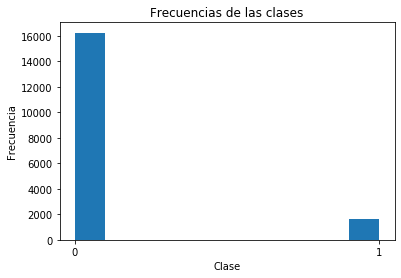

In [7]:
one = 0
zero = 0

for i in range(0, len(y_test)):
    if y_test[i] == 0:
        zero += 1
    else: 
        one+= 1
        
print("Class 0: %s | Class 1: %s" %(zero, one))
                                    
plt.figure()
plt.hist(y)
plt.title('Frecuencias de las clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks([0,1])
plt.grid(False)
plt.show()
plt.close()

In [8]:
tp = 0
fp = 0
tn = 0
fn = 0

for i in range(0, len(X_test)):
    pred = logreg_array[3].predict(X_test[i].reshape(1, -1))
    
    if pred == 1 and y_test[i] == 1:
        tp += 1
    elif pred ==0 and y_test[i] == 0:
        tn += 1
    elif pred == 1 and y_test[i] == 0:
        fp += 1
    else:
        fn +=1
        
print("| TP: %s | FP: %s \n| TN: %s | FN: %s" %(tp,fp,tn,fn))

| TP: 0 | FP: 0 
| TN: 9081 | FN: 919


Como se puede comprobar por la matriz de confusión, el modelo siempre está prediciendo la clase 0.

Para comprobar si es posible realizar una clasificación real utilizando una regresión logística, se realiza un oversampling de la clase minoritaria utilizando el algoritmo SMOTE en el programa Knime. A continuación, se vuelven a entrenar los modelos sobre el nuevo conjunto de datos.

Filas de la matriz: 32518
Columnas de la matriz: 9
Tamaño X entrenamiento: 22518 | Tamaño y entrenamiento: 22518
Tamaño X prueba: 10000 | Tamaño y prueba: 10000


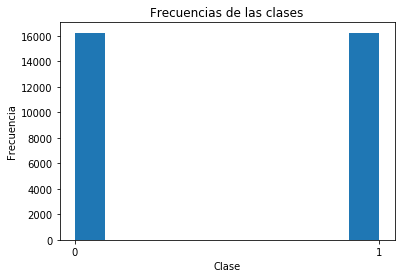

-----------------------------
Set de entrenamiento 0
    Tamaño X de entrenamiento: 100 | Tamaño y de entrenamiento: 100
-----------------------------
Set de entrenamiento 1
    Tamaño X de entrenamiento: 500 | Tamaño y de entrenamiento: 500
-----------------------------
Set de entrenamiento 2
    Tamaño X de entrenamiento: 1000 | Tamaño y de entrenamiento: 1000
-----------------------------
Set de entrenamiento 3
    Tamaño X de entrenamiento: 5000 | Tamaño y de entrenamiento: 5000
El Modelo entrenado con 100.0 datos predijo correctamente el 0.4757 porciento de los datos de entrenamiento
El Modelo entrenado con 500.0 datos predijo correctamente el 0.3781 porciento de los datos de entrenamiento
El Modelo entrenado con 1000.0 datos predijo correctamente el 0.5081 porciento de los datos de entrenamiento
El Modelo entrenado con 5000.0 datos predijo correctamente el 0.6548 porciento de los datos de entrenamiento
TP: 275 | FP: 2808 | TN: 6273 | FN: 644


In [9]:
data_matrix_smote = np.loadtxt(open("./HTRU2/HTRU_2_oversampled.csv", "rb"), delimiter=",", skiprows=0)

print("Filas de la matriz: " + str(len(data_matrix_smote)))
print("Columnas de la matriz: " + str(len(data_matrix_smote[0])))

X_smote = np.resize(data_matrix, (len(data_matrix_smote), len(data_matrix_smote[0])-1))
y_smote = data_matrix_smote[:,len(data_matrix_smote[0])-1]

X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size = 10000.00/float(len(X_smote))) 

print("Tamaño X entrenamiento: %s | Tamaño y entrenamiento: %s" % (len(X_train_smote), len(y_train_smote)))
print("Tamaño X prueba: %s | Tamaño y prueba: %s" % (len(X_test_smote), len(y_test_smote)))

sizes_smote = [100.00, 500.00, 1000.00, 5000.00]
X_train_array_smote = []
y_train_array_smote = []


plt.figure()
plt.hist(y_smote)
plt.title('Frecuencias de las clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.xticks([0,1])
plt.grid(False)
plt.show()
plt.close()

for i in sizes_smote:
    Xy_smote = train_test_split(X_train_smote, y_train_smote, test_size = 1.00 - i/float(len(X_train_smote)))
    X_train_array_smote.append(Xy_smote[0])
    y_train_array_smote.append(Xy_smote[2])
    
#Verificar tamaños de los nuevos sets de entrenamiento
for i in range(0, len(X_train_array_smote)):
    print("-----------------------------")
    print("Set de entrenamiento %s" % i)
    print("    Tamaño X de entrenamiento: %s | Tamaño y de entrenamiento: %s" 
          % (len(X_train_array_smote[i]), len(y_train_array_smote[i])))
    
logreg_array_smote = []
logreg_score_smote = []

for i in range(0, len(X_train_array_smote)):
    #Se entrena la regresión logística con el conjunto de entrenamiento correspondiente.
    logreg_array_smote.append(LogisticRegression(solver="lbfgs").fit(X_train_array_smote[i], y_train_array_smote[i]))
    
    #Se prueba la regresión logística con los conjuntos de prueba:
    logreg_score_smote.append(logreg_array_smote[i].score(X_test, y_test))
    
    #Se imprimen los resultados del modelo
    print("El Modelo entrenado con %s datos predijo correctamente el %s porciento de los datos de entrenamiento" 
         % (sizes_smote[i], logreg_score_smote[i]))

    
tp = 0
fp = 0
tn = 0
fn = 0

for i in range(0, len(X_test_smote)):
    pred = logreg_array_smote[3].predict(X_test[i].reshape(1, -1))
    
    if pred == 1 and y_test[i] == 1:
        tp += 1
    elif pred ==0 and y_test[i] == 0:
        tn += 1
    elif pred == 1 and y_test[i] == 0:
        fp += 1
    else:
        fn +=1
        
print("TP: %s | FP: %s | TN: %s | FN: %s" %(tp,fp,tn,fn))

Como puede observarse, se entrenaron las regresiones logísticas utilizando un conjunto de datos en el cual se le realizó oversampling a la clase minoritaria utilizando SMOTE para que quedaran balanceados.<br>

A continuación, se probaron los modelos utilizando el conjunto de datos de prueba original. Sin embargo, como puede observarse,  desempeño de los modelos es inconsistente y pobre, encontrandose inclusive, con una exactitud menor al 50%. Aún así debe resaltarse que, con estos modelos se hacen algunas predicciones (aunque pobres) de la clase 1. <br>

Finalmente, se realizó un último intento por mejorar el desempeño de los modelos realizando una normalización de los datos antes de entrenar los modelos. Para hacer esto, se utiliza StandardScaler de sklearn. Sin embargo, el resultado es idéntico al conjunto de datos original sin ningún tipo de normalización.

In [10]:
from sklearn.preprocessing import StandardScaler

data_matrix_norm = np.loadtxt(open("./HTRU2/HTRU_2.csv", "rb"), delimiter=",", skiprows=0)

print("Filas de la matriz: " + str(len(data_matrix_norm )))
print("Columnas de la matriz: " + str(len(data_matrix_norm [0])))

X_norm = np.resize(data_matrix_norm, (len(data_matrix_norm), len(data_matrix_norm[0])-1))
y_norm = data_matrix_norm[:,len(data_matrix_norm[0])-1]

X_norm = StandardScaler().fit_transform(X_norm)

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_norm, y_norm, test_size = 10000.00/float(len(X_norm))) 

print("Tamaño X entrenamiento: %s | Tamaño y entrenamiento: %s" % (len(X_train_norm), len(y_train_norm)))
print("Tamaño X prueba: %s | Tamaño y prueba: %s" % (len(X_test_norm), len(y_test_norm)))

sizes_norm = [100.00, 500.00, 1000.00, 5000.00]
X_train_array_norm = []
y_train_array_norm = []

for i in sizes_smote:
    Xy_norm = train_test_split(X_train_norm, y_train_norm, test_size = 1.00 - i/float(len(X_train_norm)))
    X_train_array_norm.append(Xy_norm[0])
    y_train_array_norm.append(Xy_norm[2])
    
#Verificar tamaños de los nuevos sets de entrenamiento
for i in range(0, len(X_train_array_norm)):
    print("-----------------------------")
    print("Set de entrenamiento %s" % i)
    print("    Tamaño X de entrenamiento: %s | Tamaño y de entrenamiento: %s" 
          % (len(X_train_array_norm[i]), len(y_train_array_norm[i])))
    
logreg_array_norm = []
logreg_score_norm = []

for i in range(0, len(X_train_array_norm)):
    
    #Se entrena la regresión logística con el conjunto de entrenamiento correspondiente.
    logreg_array_norm.append(LogisticRegression(solver="lbfgs").fit(X_train_array_norm[i], y_train_array_norm[i]))
        
    #Se prueba la regresión logística con los conjuntos de prueba:
    logreg_score_norm.append(logreg_array_norm[i].score(X_test_norm, y_test_norm))
    
    #Se imprimen los resultados del modelo
    print("------------------------------------------------------------------------")
    print("El Modelo entrenado con %s datos predijo correctamente el %s porciento de los datos de entrenamiento" 
         % (sizes[i], logreg_score_norm[i]))


tp = 0
fp = 0
tn = 0
fn = 0

for i in range(0, len(X_test_norm)):
    pred = logreg_array_norm[3].predict(X_test_norm[i].reshape(1, -1))
    
    if pred == 1 and y_test_norm[i] == 1:
        tp += 1
    elif pred ==0 and y_test_norm[i] == 0:
        tn += 1
    elif pred == 1 and y_test_norm[i] == 0:
        fp += 1
    else:
        fn +=1
        
print("TP: %s | FP: %s | TN: %s | FN: %s" %(tp,fp,tn,fn))

Filas de la matriz: 17898
Columnas de la matriz: 9
Tamaño X entrenamiento: 7898 | Tamaño y entrenamiento: 7898
Tamaño X prueba: 10000 | Tamaño y prueba: 10000
-----------------------------
Set de entrenamiento 0
    Tamaño X de entrenamiento: 100 | Tamaño y de entrenamiento: 100
-----------------------------
Set de entrenamiento 1
    Tamaño X de entrenamiento: 500 | Tamaño y de entrenamiento: 500
-----------------------------
Set de entrenamiento 2
    Tamaño X de entrenamiento: 1000 | Tamaño y de entrenamiento: 1000
-----------------------------
Set de entrenamiento 3
    Tamaño X de entrenamiento: 5000 | Tamaño y de entrenamiento: 5000
------------------------------------------------------------------------
El Modelo entrenado con 100.0 datos predijo correctamente el 0.9021 porciento de los datos de entrenamiento
------------------------------------------------------------------------
El Modelo entrenado con 500.0 datos predijo correctamente el 0.9069 porciento de los datos de entre